Response rate:
https://surveyanyplace.com/average-survey-response-rate/

The response rate would be based on if Florence =1, i.e if the art history of florence was bought. This would be the outcome variable.

To get all 60 combinations of RFM categories, read 
https://www.google.com/amp/s/www.geeksforgeeks.org/python-all-possible-permutations-of-n-lists/amp/


In [906]:
#Note: If Florence = 0, No_Florence = 1 and Yes_Florence = 0
#      If florence = 1, No_Florence = 0 and Yes_Florence = 1

In [907]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import itertools 
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from dmba import classificationSummary, liftChart, gainsChart

In [908]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [909]:
cbc = pd.read_csv('CharlesBookClub.csv')

In [910]:
CBC = cbc.copy()

In [911]:
cbc.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')

In [912]:
cbc.shape

(4000, 24)

In [913]:
#If Florence = 0, No_Florence = 1 and Yes_Florence = 0
cbc[cbc['Florence'] == 0].head(5)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0,5,3,1,0,1


In [914]:
#If florence = 1, No_Florence = 0 and Yes_Florence = 1
cbc[cbc['Florence'] == 1].head(5)

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
11,12,100,0,320,2,3,18,0,0,0,0,0,1,0,0,0,0,1,1,5,1,3,1,0
12,13,103,1,268,4,1,4,0,0,0,0,0,0,0,0,0,0,1,0,5,2,1,1,0
19,20,145,1,393,12,11,50,3,0,2,0,0,2,3,0,0,0,1,5,5,3,3,1,0
56,57,440,1,458,10,12,44,1,0,3,1,1,2,0,2,1,1,1,6,5,3,3,1,0
59,60,453,1,154,10,7,46,0,1,0,1,0,1,3,0,0,0,1,4,4,3,3,1,0


In [915]:
y = cbc['Florence']
X = cbc.drop(columns=['Florence'])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [916]:
train_X.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
3999,4000,32977,1,114,10,2,12,0,0,0,0,0,0,1,0,0,0,1,4,3,2,0,1
2745,2746,22736,1,150,30,5,42,1,0,1,1,2,3,0,0,0,0,3,4,4,3,0,1
492,493,4490,1,372,20,8,66,2,0,3,1,1,0,1,1,1,0,3,5,4,3,0,1
961,962,7942,1,84,24,1,24,0,0,0,1,0,0,0,0,0,0,0,3,4,1,0,1
2939,2940,24309,0,267,8,1,8,0,0,0,0,0,0,0,0,0,0,0,5,3,1,0,1


In [917]:
train_X.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Related Purchase', 'Mcode',
       'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')

In [918]:
#What is the response rate for the training data customers taken as a whole?
train_X_Yes_Florence = train_X[train_X['Yes_Florence'] == 1]
A = (len(train_X_Yes_Florence)/len(train_X)) * 100
print('response rate for the training data customers taken as a whole is: ' + str(A) + '%')

response rate for the training data customers taken as a whole is: 8.833333333333334%


In [919]:
# initializing list of list  
all_list = [['R1', 'R2', 'R3', 'R4'], ['F1', 'F2', 'F3'], ['M1', 'M2', 'M3', 'M4', 'M5']] 

In [920]:
# printing lists  
print ("The original lists are : " + str(all_list)) 

The original lists are : [['R1', 'R2', 'R3', 'R4'], ['F1', 'F2', 'F3'], ['M1', 'M2', 'M3', 'M4', 'M5']]


In [921]:
# using itertools.product()   
# to compute all possible combinations 
res = list(itertools.product(*all_list))

In [922]:
# printing result 
print ("All possible combinations are : " +  str(res)) 

All possible combinations are : [('R1', 'F1', 'M1'), ('R1', 'F1', 'M2'), ('R1', 'F1', 'M3'), ('R1', 'F1', 'M4'), ('R1', 'F1', 'M5'), ('R1', 'F2', 'M1'), ('R1', 'F2', 'M2'), ('R1', 'F2', 'M3'), ('R1', 'F2', 'M4'), ('R1', 'F2', 'M5'), ('R1', 'F3', 'M1'), ('R1', 'F3', 'M2'), ('R1', 'F3', 'M3'), ('R1', 'F3', 'M4'), ('R1', 'F3', 'M5'), ('R2', 'F1', 'M1'), ('R2', 'F1', 'M2'), ('R2', 'F1', 'M3'), ('R2', 'F1', 'M4'), ('R2', 'F1', 'M5'), ('R2', 'F2', 'M1'), ('R2', 'F2', 'M2'), ('R2', 'F2', 'M3'), ('R2', 'F2', 'M4'), ('R2', 'F2', 'M5'), ('R2', 'F3', 'M1'), ('R2', 'F3', 'M2'), ('R2', 'F3', 'M3'), ('R2', 'F3', 'M4'), ('R2', 'F3', 'M5'), ('R3', 'F1', 'M1'), ('R3', 'F1', 'M2'), ('R3', 'F1', 'M3'), ('R3', 'F1', 'M4'), ('R3', 'F1', 'M5'), ('R3', 'F2', 'M1'), ('R3', 'F2', 'M2'), ('R3', 'F2', 'M3'), ('R3', 'F2', 'M4'), ('R3', 'F2', 'M5'), ('R3', 'F3', 'M1'), ('R3', 'F3', 'M2'), ('R3', 'F3', 'M3'), ('R3', 'F3', 'M4'), ('R3', 'F3', 'M5'), ('R4', 'F1', 'M1'), ('R4', 'F1', 'M2'), ('R4', 'F1', 'M3'), ('R4', 

In [923]:
len(res)

60

In [924]:
#Response rate when R=1, F=1 and M=1
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=1 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=1 and Mcode=1 is: 0.0%


In [925]:
#Response rate when R=1, F=1 and M=2
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=1 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=1 and Mcode=2 is: 0.0%


In [926]:
#Response rate when R=1, F=1 and M=3
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=1 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=1 and Mcode=3 is: 0.0%


In [927]:
#Response rate when R=1, F=1 and M=4
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=1 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=1 and Mcode=4 is: 0.125%


In [928]:
#Response rate when R=1, F=1 and M=5
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100  
print('Response rate when Rcode=1, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=1 and Mcode=5 is: 0.16666666666666669%


In [929]:
#('R1', 'F2', 'M1')
#Response rate when R=1, F=2 and M=1
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=2 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=2 and Mcode=1 is: 0.0%


In [930]:
#('R1', 'F2', 'M2')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=2 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=2 and Mcode=2 is: 0.08333333333333334%


In [931]:
#('R1', 'F2', 'M3')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=2 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=2 and Mcode=3 is: 0.0%


In [932]:
#('R1', 'F2', 'M4')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=2 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=2 and Mcode=4 is: 0.04166666666666667%


In [933]:
#('R1', 'F2', 'M5')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=2 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=2 and Mcode=5 is: 0.08333333333333334%


In [934]:
#('R1', 'F3', 'M1')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=1 is: 0.0%


In [935]:
#('R1', 'F3', 'M2')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=2 is: 0.0%


In [936]:
#('R1', 'F3', 'M3')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=3 is: 0.04166666666666667%


In [937]:
#('R1', 'F3', 'M4')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=4 is: 0.04166666666666667%


In [938]:
#('R1', 'F3', 'M5')
A = len(train_X[(train_X['Rcode'] == 1) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=5 is: 0.33333333333333337%


In [939]:
#('R2', 'F1', 'M1')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=1 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=1 and Mcode=1 is: 0.08333333333333334%


In [940]:
#('R2', 'F1', 'M2')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=1 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=1 and Mcode=2 is: 0.125%


In [941]:
#('R2', 'F1', 'M3')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=1 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=1 and Mcode=3 is: 0.125%


In [942]:
#('R2', 'F1', 'M4')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=1 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=1 and Mcode=4 is: 0.0%


In [943]:
#('R2', 'F1', 'M5')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=1 and Mcode=5 is: 0.20833333333333334%


In [944]:
#('R2', 'F2', 'M1')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=2 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=2 and Mcode=1 is: 0.0%


In [945]:
#('R2', 'F2', 'M2')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=2 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=2 and Mcode=2 is: 0.04166666666666667%


In [946]:
#('R2', 'F2', 'M3')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=2 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=2 and Mcode=3 is: 0.16666666666666669%


In [947]:
#('R2', 'F2', 'M4')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=2 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=2 and Mcode=4 is: 0.20833333333333334%


In [948]:
#('R2', 'F2', 'M5')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=2 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=2 and Mcode=5 is: 0.08333333333333334%


In [949]:
#('R2', 'F3', 'M1')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=1 is: 0.0%


In [950]:
#('R2', 'F3', 'M2')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=2 is: 0.0%


In [951]:
#('R2', 'F3', 'M3')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=3 is: 0.04166666666666667%


In [952]:
#('R2', 'F3', 'M4')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=4 is: 0.33333333333333337%


In [953]:
#('R2', 'F3', 'M5')
A = len(train_X[(train_X['Rcode'] == 2) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=5 is: 0.6666666666666667%


In [954]:
#('R3', 'F1', 'M1')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=1 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=1 and Mcode=1 is: 0.04166666666666667%


In [955]:
#('R3', 'F1', 'M2')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=1 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=1 and Mcode=2 is: 0.08333333333333334%


In [956]:
#('R3', 'F1', 'M3')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=1 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=1 and Mcode=3 is: 0.04166666666666667%


In [957]:
#('R3', 'F1', 'M4')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=1 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=1 and Mcode=4 is: 0.25%


In [958]:
#('R3', 'F1', 'M5')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=1 and Mcode=5 is: 0.16666666666666669%


In [959]:
#('R3', 'F2', 'M1')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=2 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=2 and Mcode=1 is: 0.0%


In [960]:
#('R3', 'F2', 'M2')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=2 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=2 and Mcode=2 is: 0.04166666666666667%


In [961]:
#('R3', 'F2', 'M3')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=2 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=2 and Mcode=3 is: 0.08333333333333334%


In [962]:
#('R3', 'F2', 'M4')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=2 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=2 and Mcode=4 is: 0.125%


In [963]:
#('R3', 'F2', 'M5')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=2 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=2 and Mcode=5 is: 0.16666666666666669%


In [964]:
#('R3', 'F3', 'M1')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=1 is: 0.0%


In [965]:
#('R3', 'F3', 'M2')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=2 is: 0.0%


In [966]:
#('R3', 'F3', 'M3') 
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=3 is: 0.0%


In [967]:
#('R3', 'F3', 'M4')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=4 is: 0.20833333333333334%


In [968]:
('R3', 'F3', 'M5')
A = len(train_X[(train_X['Rcode'] == 3) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=5 is: 1.1666666666666667%


In [969]:
#('R4', 'F1', 'M1')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=1 is: 0.0%


In [970]:
#('R4', 'F1', 'M2')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=2 is: 0.08333333333333334%


In [971]:
#('R4', 'F1', 'M3')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=3 is: 0.4166666666666667%


In [972]:
#('R4', 'F1', 'M4')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=4 is: 0.5%


In [973]:
#('R4', 'F1', 'M5')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 1) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=5 is: 0.25%


In [974]:
#('R4', 'F2', 'M1')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=2 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=2 and Mcode=1 is: 0.0%


In [975]:
#('R4', 'F2', 'M2')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=2 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=2 and Mcode=2 is: 0.04166666666666667%


In [976]:
#('R4', 'F2', 'M3')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=2 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=2 and Mcode=3 is: 0.08333333333333334%


In [977]:
#('R4', 'F2', 'M4')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=2 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=2 and Mcode=4 is: 0.25%


In [978]:
#('R4', 'F2', 'M5')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 2) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=2 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=2 and Mcode=5 is: 0.4583333333333333%


In [979]:
#('R4', 'F3', 'M1')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 1) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=1 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=1 is: 0.0%


In [980]:
#('R4', 'F3', 'M2')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 2) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=2 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=2 is: 0.0%


In [981]:
#('R4', 'F3', 'M3')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 3) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=3 is: 0.08333333333333334%


In [982]:
#('R4', 'F3', 'M4')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 4) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=4 is: 0.4166666666666667%


In [983]:
#('R4', 'F3', 'M5')
A = len(train_X[(train_X['Rcode'] == 4) & (train_X['Fcode'] == 3) & (train_X['Mcode'] == 5) & (train_X['Yes_Florence'] == 1)])
B = len(train_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=5 is: 0.8750000000000001%


The combination with a response rate in the training data that is above the overall response in the training data 
is the combination with Rcode=4, Fcode=3 and Mcode=5

In [984]:
print('The average response rate for the 60 combinations in the training data is 0.1472')

The average response rate for the 60 combinations in the training data is 0.1472


The above average RFM combinations in the training data are: R1F1M5, R1F3M5, R2F1M5, R2F2M3, R2F2M4, R2F3M4, R2F3M5, R3F1M5, R3F2M5,
R3F3M4, R3F3M5, R4F1M3, R4F1M4,, R4F1M5, R4F2M5, R4F3M4 and R4F3M5

In [985]:
#Response rate in the validation data using the above combinations
#('R1', 'F1', 'M5')
A = len(valid_X[(valid_X['Rcode'] == 1) & (valid_X['Fcode'] == 1) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=1 and Mcode=5 is: 0.0%


In [986]:
#('R1', 'F3', 'M5')
A = len(valid_X[(valid_X['Rcode'] == 1) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=5 is: 0.375%


In [987]:
#('R2', 'F1', 'M5')
A = len(valid_X[(valid_X['Rcode'] == 2) & (valid_X['Fcode'] == 1) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=1 and Mcode=5 is: 0.0625%


In [988]:
#('R1', 'F3', 'M5')
A = len(valid_X[(valid_X['Rcode'] == 1) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=1, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=1, Fcode=3 and Mcode=5 is: 0.375%


In [989]:
#('R2', 'F2', 'M4')
A = len(valid_X[(valid_X['Rcode'] == 2) & (valid_X['Fcode'] == 2) & (valid_X['Mcode'] == 4) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=2 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=2 and Mcode=4 is: 0.0625%


In [990]:
#('R2', 'F3', 'M4')
A = len(valid_X[(valid_X['Rcode'] == 2) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 4) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=4 is: 0.0625%


In [991]:
#('R2','F3', 'M5')
A = len(valid_X[(valid_X['Rcode'] == 2) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=2, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=2, Fcode=3 and Mcode=5 is: 0.375%


In [992]:
#R3F1M5 
A = len(valid_X[(valid_X['Rcode'] == 3) & (valid_X['Fcode'] == 1) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=1 and Mcode=5 is: 0.1875%


In [993]:
#R3F2M5 
A = len(valid_X[(valid_X['Rcode'] == 3) & (valid_X['Fcode'] == 2) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=2 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=2 and Mcode=5 is: 0.1875%


In [994]:
#R3F3M4 
A = len(valid_X[(valid_X['Rcode'] == 3) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 4) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=4 is: 0.3125%


In [995]:
#R3F3M5
A = len(valid_X[(valid_X['Rcode'] == 3) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=3, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=3, Fcode=3 and Mcode=5 is: 1.5%


In [996]:
#R4F1M3 
A = len(valid_X[(valid_X['Rcode'] == 4) & (valid_X['Fcode'] == 1) & (valid_X['Mcode'] == 3) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=3 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=3 is: 0.125%


In [997]:
#R4F1M4
A = len(valid_X[(valid_X['Rcode'] == 4) & (valid_X['Fcode'] == 1) & (valid_X['Mcode'] == 4) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=4 is: 0.125%


In [998]:
#R4F1M5
A = len(valid_X[(valid_X['Rcode'] == 4) & (valid_X['Fcode'] == 1) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=1 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=1 and Mcode=5 is: 0.43750000000000006%


In [999]:
#R4F2M5
A = len(valid_X[(valid_X['Rcode'] == 4) & (valid_X['Fcode'] == 2) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=2 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=2 and Mcode=5 is: 0.375%


In [1000]:
#R4F3M4 
A = len(valid_X[(valid_X['Rcode'] == 4) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 4) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=4 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=4 is: 0.3125%


In [1001]:
#R4F3M5
A = len(valid_X[(valid_X['Rcode'] == 4) & (valid_X['Fcode'] == 3) & (valid_X['Mcode'] == 5) & (valid_X['Yes_Florence'] == 1)])
B = len(valid_X)
C = A/B * 100
print('Response rate when Rcode=4, Fcode=3 and Mcode=5 is: ' + str(C) + '%')

Response rate when Rcode=4, Fcode=3 and Mcode=5 is: 1.0625%


In [1002]:
#SEGMENT 1
##RFM combinations that have response rates that exceed 0.294 in the training data are R1F3M5, R2F3M4, R2F3M5, R3F3M5, R4F1M3,
#R4F1M4,R4F2M5,R4F3M4,R4F3M5

In [1003]:
#SEGMENT2
#RFM combinations that have response rates that  exceed 0.147 but do not exceed 0.294 in the training data are:

In [1004]:
#SEGMMENT 3
#The remaining RFM combinations are:

In [1005]:
#Apply the results from segments 1-3 to part 2

In [1006]:
CBC['Number'] = CBC.index + 1 

In [1007]:
CBC.drop(['Seq#', 'ID#'], axis = 1, inplace = True)

In [1008]:
trainData, validData = train_test_split(CBC, test_size = 0.4, random_state = 1)
print(trainData.shape, validData.shape)

(2400, 23) (1600, 23)


In [1009]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']])  # Note the use of an array of column names

#Transform the full dataset
CBCNorm = pd.concat([pd.DataFrame(scaler.transform(CBC[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']]),
                                  columns = ['zR', 'zF', 'zM', 'zFirstPurch', 'zRelated Purchase']),
                                   CBC[['Florence', 'Number']]], axis = 1)
trainNorm = CBCNorm.iloc[trainData.index]
validNorm = CBCNorm.iloc[validData.index]

In [1010]:
trainNorm.head()

,zR,zF,zM,zFirstPurch,zRelated Purchase,Florence,Number
3999,-0.417289,-0.526337,-0.905340,-0.784969,0.112519,0,4000
2745,2.033746,0.349270,-0.549372,0.857178,1.784631,0,2746
492,0.808229,1.224876,1.645760,2.170895,1.784631,0,493
961,1.298436,-0.818206,-1.201979,-0.128110,-0.723537,0,962
2939,-0.662392,-0.818206,0.607522,-1.003922,-0.723537,0,2940


In [1011]:
train_X = trainNorm[['zR', 'zF', 'zM', 'zFirstPurch', 'zRelated Purchase']]
train_y = trainNorm['Florence']
valid_X = validNorm[['zR', 'zF', 'zM', 'zFirstPurch', 'zRelated Purchase']]
valid_y = validNorm['Florence']

# Train a classifier for different values of k
results = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.846250
1    2  0.912500
2    3  0.895625
3    4  0.917500
4    5  0.913750
5    6  0.919375
6    7  0.916875
7    8  0.918750
8    9  0.916875
9   10  0.920000
10  11  0.918750


The best k model is when k = 10

In [1012]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(train_X, train_y)
y_pred_class = knn.predict(valid_X)

In [1013]:
##Create a lift curve for k = 10 model, and report the expected lift for an equal number of customers 
#from the validation dataset

Text(0.5, 1.0, 'Cumulative Gains Chart')

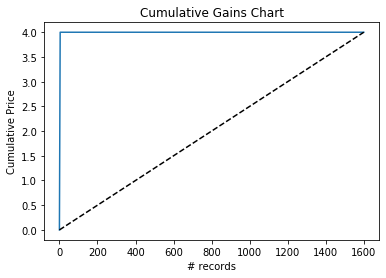

In [1014]:
pred_v = pd.Series(y_pred_class)
pred_v = pred_v.sort_values(ascending=False)

ax = gainsChart(pred_v)
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

In [1015]:
###This code works but scikitplot is not installing on anaconda

#from scikitplot.metrics import plot_lift_curve
#fig, ax = plt.subplots()
#plot_lift_curve(valid_y, knn.predict_proba(valid_X), ax=ax)

In [1016]:
knn = KNeighborsRegressor(n_neighbors = 10).fit(train_X, train_y)
y_pred_reg = knn.predict(valid_X)

In [1017]:
y_pred_reg.min()

0.0

In [1018]:
y_pred_reg.max()

0.7

The prediction will fall between 0.0 and 0.7

Text(0.5, 1.0, 'Cumulative Gains Chart')

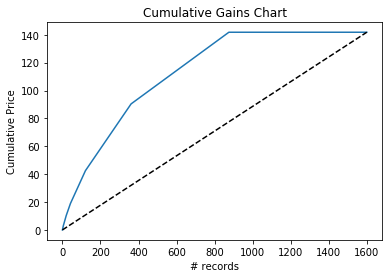

In [1019]:
pred_v = pd.Series(y_pred_reg)
pred_v = pred_v.sort_values(ascending=False)

ax = gainsChart(pred_v)
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

In [1020]:
##Using logistic Regression

In [1021]:
book_club = pd.read_csv('CharlesBookClub.csv')

In [1022]:
book_club.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,0,0,0,0,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,0,1,0,1,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,0,0,0,0,0,0,0,0,0,5,3,1,0,1


In [1023]:
book_club.drop(['Seq#','ID#', 'Yes_Florence', 'No_Florence'],  axis = 1, inplace = True)

In [1024]:
X = book_club.drop(['Florence'], axis = 1)
y = book_club['Florence']

In [1025]:
#partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state = 1)

#fit a logistic regression (set penalty = l2 and C = 1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1026]:
y_pred_full = logit_reg.predict(valid_X)

In [1027]:
y_pred_full_prob = logit_reg.predict_proba(valid_X)

In [1028]:
classificationSummary(valid_y, y_pred_full)

Confusion Matrix (Accuracy 0.9237)

       Prediction
Actual    0    1
     0 1474    0
     1  122    4


In [1029]:
#Select a subset of predictors that you judge to be the best

In [1030]:
predictors = ['R', 'F', 'M']
outcome = ['Florence']
X = book_club[predictors]
y = book_club[outcome]

#partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state = 1)

#fit a logistic regression (set penalty = l2 and C = 1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
logit_reg.fit(train_X, train_y)

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [1031]:
y_pred_RFM = logit_reg.predict(valid_X)

In [1032]:
y_pred_RFM_prob = logit_reg.predict_proba(valid_X)

In [1033]:
classificationSummary(valid_y, y_pred_RFM)

Confusion Matrix (Accuracy 0.9213)

       Prediction
Actual    0    1
     0 1474    0
     1  126    0


Text(0.5, 1.0, 'Cumulative Gains Chart')

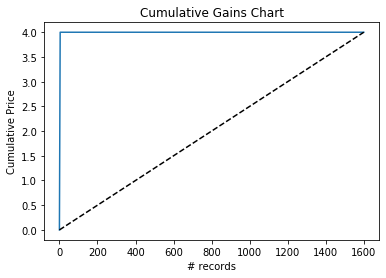

In [1034]:
pred_v_full = pd.Series(y_pred_full)
pred_v_full = pred_v_full.sort_values(ascending=False)

ax = gainsChart(pred_v_full)
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

Text(0.5, 1.0, 'Cumulative Gains Chart')

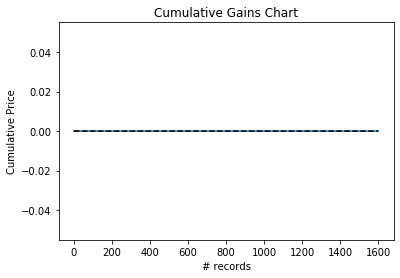

In [1035]:
pred_v_RFM = pd.Series(y_pred_RFM)
pred_v_RFM = pred_v_RFM.sort_values(ascending=False)

ax = gainsChart(pred_v_RFM)
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

If the cutoff criterion for a campaign is a 30% likelihood of a purchase, find the customers in the validation data that would be targeted and count the number of buyers in this set.